POSTTEST 8

NAMA : Asrina Nur Syahbani

Nim : 2009106131

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.boston_housing.load_data()

57026/57026 [==============================] - 11s 201us/step


In [6]:
print(f'panjang x train:{len(x_train_raw)}',
      f'panjang y train:{len(y_train_raw)}', 
      f'panjang x test:{len(x_test_raw)}', 
      f'panjang y test:{len(y_test_raw)}',
sep='\n')

panjang x train:404
panjang y train:404
panjang x test:102
panjang y test:102


TypeError: Invalid shape (13,) for image data

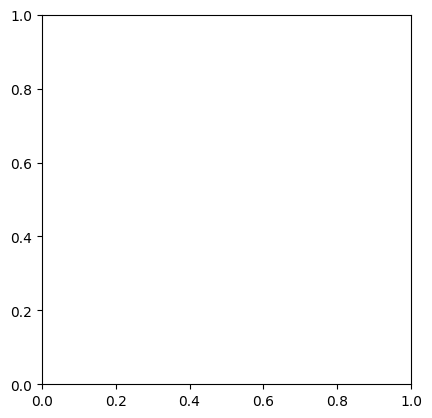

In [11]:
plt.imshow(x_test_raw[1])

In [12]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [13]:
x_train_raw.shape

(404, 13)

In [18]:
x_train = tf.reshape(x_train_raw,[404, 13])
x_test = tf.reshape(x_test_raw,[100, 13])

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 1326 values, but the requested shape has 1300 [Op:Reshape]

In [15]:
type(x_train)

NameError: name 'x_train' is not defined

In [16]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

NameError: name 'x_train' is not defined

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),
     tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(num_class, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 201)               6633      
                                                                 
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    x_train, y_train,
    epochs=5, steps_per_epoch=5,
    verbose=2,
    validation_data=(x_test, y_test)
)

NameError: name 'x_test' is not defined

In [24]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label = 'training')
plt.plot(nilai_x, history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [25]:
model.save('model/model.h5')